# Rosseland Mean Opacity

Figure 4.3 from Chapter 4 of Stellar Structure & Evolution Pinsonneault & Ryden, Cambridge University Press.

Rosseland mean opacity as a function of temperature for gas of solar abundance (photosphere: X=0.749, Y=0.238,
Z=0.013). 

Data for different densities are from the Opacity Project.

In [6]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [7]:
plotFile = 'Fig4_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data and Model

### Opacity Project Data

Opacity Project data are in ASCII files with names like `Rosseland_OP_rho-10.txt`, where the number before .txt
is $\log\rho$={-10,-8,-6,-4,-2,0,+2}.  logT is in column 1, $\log\kappa$ is in column 4.

Each curve is labeled with $\log \rho$, where $\rho$ is in units of ${\rm\,g}{\rm\,cm}^{-3}$. 

In [8]:
dataDir = './Rosseland'

listRho = ['-10','-8','-6','-4','-2','0','+2']
lineSty = ['-'  ,':' ,'-' ,':' ,'-' ,':','-']
labelXY = [(12000,0.5),(1.3e4,20),(1.8e4,800),(3e4,2e4),(4e4,2e5),(3.5e6,30),(1.5e7,3)]

opT = []
opK = []
for logRho in listRho:
    rhoNum = int(logRho)
    if rhoNum==0:
        opFile = f'{dataDir}/Rosseland_OP_rho+0.txt'
    else:
        opFile = f'{dataDir}/Rosseland_OP_rho{logRho}.txt' 
    
    opData = pd.read_csv(opFile,sep=r'\s+',header=None,comment='#')
    opT.append(10.0**np.array(opData[0]))
    opK.append(10.0**np.array(opData[3]))
    
minT = 1.0e3
maxT = 1.0e8
minK = 1.0e-4
maxK = 1.0e6

### Kramers' Law Model

The dashed line indicates the Kramers' law approximation for gas of density $\rho = 0.1 {\rm\,g}{\rm\,cm}^{-3}$:

$$
\kappa_{\rm bf} \approx 40{,}000 {\rm\,cm}^2 {\rm\,g}^{-1}
Z (1+X)
\left( {\rho \over 1 {\rm\,g}{\rm\,cm}^{-3}} \right) 
\left( {T \over 10^6 {\rm\,K}} \right)^{-3.5}
$$
and
$$
\kappa_{\rm ff} \approx 40 {\rm\,cm}^2 {\rm\,g}^{-1}
(1+X)(1-Z) \left( {\rho \over 1 {\rm\,g}{\rm\,cm}^{-3}} \right) 
\left( {T \over 10^6 {\rm\,K}} \right)^{-3.5}
$$

The model is Kramer's law (ff+bf) evaluated at $\rho=0.1$ for a restricted range of temperatures.

In [9]:
# Kramer's Opacity model for a restricted range of T and solar metallicity

rho = 0.1
X = 0.749 # solar [photosphere] abundances
Y = 0.238
Z = 0.013

minTmod = 1.0e5
maxTmod = 4.0e6

minKmod = 40000.0*Z*(1+X)*rho*(minTmod/1.0e6)**(-3.5) + 40.0*(1+X)*(1-Z)*rho*(minTmod/1.0e6)**(-3.5)
maxKmod = 40000.0*Z*(1+X)*rho*(maxTmod/1.0e6)**(-3.5) + 40.0*(1+X)*(1-Z)*rho*(maxTmod/1.0e6)**(-3.5)

## Make the Plot

Plot the Opacity Project $\kappa(T)$ curves as alternating solid and dotted lines labeled with $\log\rho$, 
and draw the Kramers' Law as a dashed line.

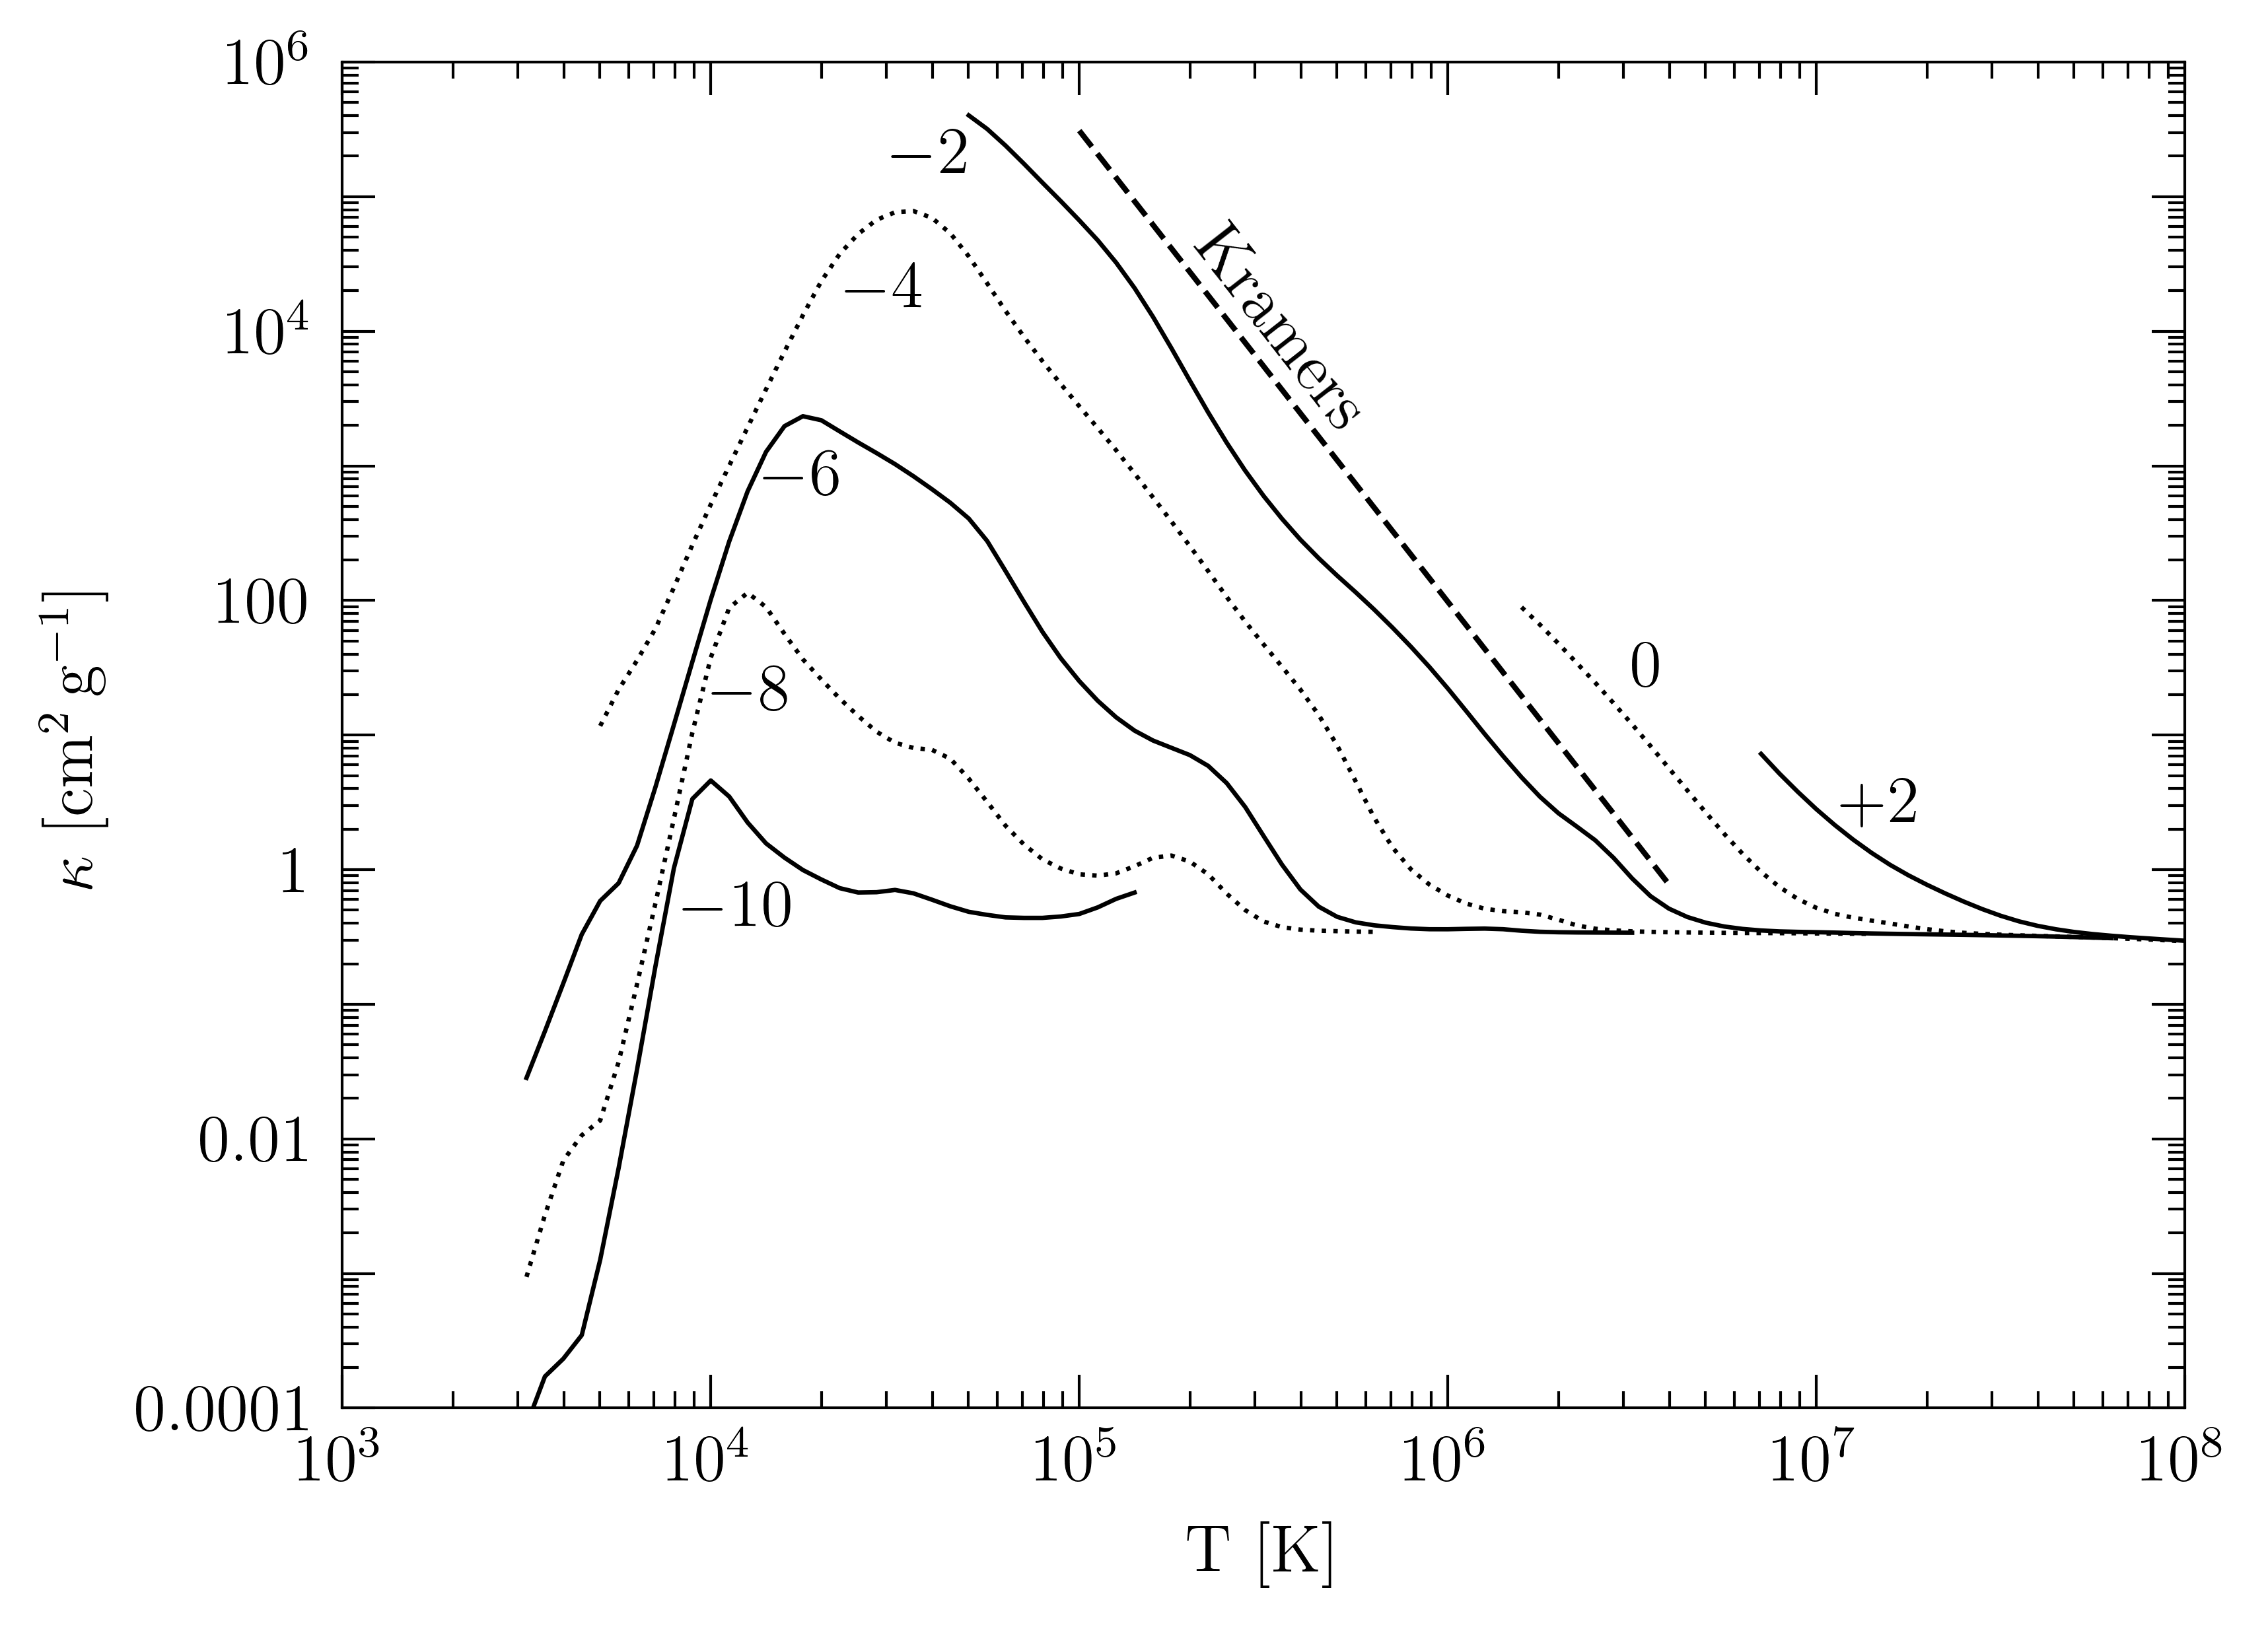

In [10]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(minT,maxT)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([1.0e3,1.0e4,1.0e5,1.0e6,1.0e7,1.0e8])
ax.set_xticklabels(['10$^{3}$','10$^{4}$','$10^{5}$','10$^{6}$','10$^{7}$','10$^{8}$'])
ax.set_xlabel(r'T [K]',fontsize=axisFontSize)

ax.set_ylim(minK,maxK)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0))
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([1.0E-4,1.0E-3,1.0E-2,0.1,1.0,10,100,1000,1.0E4,1.0E5,1.0E6])
ax.set_yticklabels(['0.0001','','0.01','','1','','100','','10$^4$','','10$^6$'])
ax.set_ylabel(r'$\kappa$ [cm$^2$\,g$^{-1}$]',fontsize=axisFontSize)

for i in range(len(listRho)):
    ax.plot(opT[i],opK[i],ls=lineSty[i],lw=0.8,color='black')
    ax.text(labelXY[i][0],labelXY[i][1],rf'${listRho[i]}$',color='black',ha='center',va='center',
            fontsize=axisFontSize)
    
# Kramer's Line

ax.plot([minTmod,maxTmod],[minKmod,maxKmod],'--',color='black',lw=1)
ax.text(3.5e5,1.0e4,'Kramers',color='black',rotation=-52.,fontsize=axisFontSize,va='center',ha='center')

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')